# Dog Emotion Prediction

In [27]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import os 
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [5]:
path = r"D:/Visual Studio Code/ML/DataSet/Dog Emotion/"

In [6]:
path_dir = os.listdir(path)
img_size = (224,224,3)
class_names = sorted(path_dir)

num_classes = len(class_names)
print(f"Number of Class: {num_classes}\nClass Name: {class_names}\nImage Size: {img_size}")

Number of Class: 4
Class Name: ['angry', 'happy', 'relaxed', 'sad']
Image Size: (224, 224, 3)


In [7]:
img_path =[]
image = []
label = []

for dir in path_dir:
    photo_path_loc = os.listdir(path+dir+"/")
    for photo in photo_path_loc:
        img_path.append(path+dir+"/"+photo)
        label.append(dir)

photo_df = pd.DataFrame(data=img_path, columns=["path"])
label_df = pd.DataFrame(data= label, columns=["emotion"] )

dog_emotion = pd.concat([photo_df,label_df],axis=1)

dog_emotion.head()



,path,emotion
0,D:/Visual Studio Code/ML/DataSet/Dog Emotion/a...,angry
1,D:/Visual Studio Code/ML/DataSet/Dog Emotion/a...,angry
2,D:/Visual Studio Code/ML/DataSet/Dog Emotion/a...,angry
3,D:/Visual Studio Code/ML/DataSet/Dog Emotion/a...,angry
4,D:/Visual Studio Code/ML/DataSet/Dog Emotion/a...,angry


In [8]:
print("Number of Data: ",len(dog_emotion))

Number of Data:  4000


In [9]:
dog_emotion['emotion'].value_counts()

emotion
angry      1000
happy      1000
relaxed    1000
sad        1000
Name: count, dtype: int64

In [10]:
# Resizing the Image 
new_size = 224
def img_process(img,new_size):

    # cvt_color = cv2.COLOR_RGB2GRAY
    # img_gray = cv2.cvtColor(img,cvt_color)

    # Rescale Image 
    img_rescale = cv2.resize(img,dsize=(new_size,new_size),interpolation=cv2.INTER_AREA)

    return img_rescale



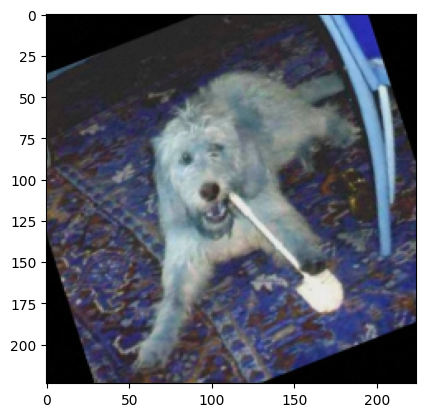

In [11]:
img = cv2.imread(r"D:\Visual Studio Code\ML\DataSet\Dog Emotion\angry\0aNyXBrmNA7XdefwHvgO2n1rnpqQAp885.jpg")
img_gray = img_process(img,new_size)
plt.imshow(img_gray) 

In [12]:
img_gray.shape

(224, 224, 3)

In [14]:
# Resizing all 

files = dog_emotion['path']

image_data = []

for img_path in dog_emotion['path']:
    img = cv2.imread(img_path)
    processed_img = img_process(img, new_size)
    image_data.append(processed_img)

x = np.array(image_data).reshape(-1, 224, 224, 3)  # Normalize


In [15]:
# Spliting the data 

label = LabelEncoder()
y = label.fit_transform(dog_emotion['emotion'])

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [16]:
print(f'train images shape: {x_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {x_test.shape}\nvalidation labels shape: {y_test.shape}\n')

train images shape: (3200, 224, 224, 3)
train labels shape: (3200,)

validation images shape: (800, 224, 224, 3)
validation labels shape: (800,)



# Using CNN but not giving good result.

In [ ]:
# cnn_model = tf.keras.Sequential()


# # Convolutional Layer 1
# cnn_model.add(Conv2D(64,(3,3),activation='relu',padding='same', input_shape = (192,192,1)))
# cnn_model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
# cnn_model.add(MaxPooling2D(pool_size=2))

# # Convolutional Layer 2
# cnn_model.add(Conv2D(128,(2,2),activation='relu',padding='same'))
# cnn_model.add(Conv2D(128,(2,2),activation='relu',padding='same'))
# cnn_model.add(MaxPooling2D(pool_size=2))

# # Convolutional Layer 3
# cnn_model.add(Conv2D(256,(2,2),activation='relu',padding='same'))
# cnn_model.add(Conv2D(256,(2,2),activation='relu',padding='same'))
# cnn_model.add(MaxPooling2D(pool_size=2))

# # Convolutional Layer 4
# cnn_model.add(Conv2D(512,(2,2),activation='relu',padding='same'))
# cnn_model.add(Conv2D(512,(2,2),activation='relu',padding='same'))
# cnn_model.add(MaxPooling2D(pool_size=2))

# # Convolutional Layer 5
# cnn_model.add(Conv2D(1024,(2,2),activation='relu',padding='same'))
# cnn_model.add(Conv2D(1024,(2,2),activation='relu',padding='same'))
# cnn_model.add(MaxPooling2D(pool_size=2))
# cnn_model.add(tf.keras.layers.GlobalAveragePooling2D())


# #Dense Layer 

# cnn_model.add(Dense(256,activation='relu'))
# cnn_model.add(Dense(128,activation='relu'))
# cnn_model.add(Dense(64,activation='relu'))
# cnn_model.add(Dense(4,activation='softmax'))

c:\Users\DragonBlade\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Now using Transfer Model for training the model.

In [ ]:
# Load MobileNetV2 for training the dataset
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

# Add custom layers on top
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(4, activation='softmax')(x)

model = tf.keras.models.Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [18]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,422,468 (9.24 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [31]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow(x_train,y_train, batch_size = 32,shuffle = True)
val_gen = val_datagen.flow(x_test, y_test, batch_size=32)

checkpoint = ModelCheckpoint('best_model.keras',monitor='val_accuracy',save_best_only=True,mode='max',verbose=1
)


early_stop = EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True,verbose=1
)

# Fit the model
history = model.fit(train_gen, validation_data=val_gen, epochs=50, callbacks=[checkpoint, early_stop])

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.7381 - loss: 0.6478
Epoch 1: val_accuracy improved from -inf to 0.67250, saving model to best_model.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 621ms/step - accuracy: 0.7382 - loss: 0.6476 - val_accuracy: 0.6725 - val_loss: 0.8344
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.7493 - loss: 0.6373
Epoch 2: val_accuracy did not improve from 0.67250
100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 606ms/step - accuracy: 0.7492 - loss: 0.6374 - val_accuracy: 0.6475 - val_loss: 0.8569
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.7480 - loss: 0.6165
Epoch 3: val_accuracy did not improve from 0.67250
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 573ms/step - accuracy: 0.7480 - loss: 0.6165 - val_accuracy: 0.6600 - val_loss: 0.8683
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - accuracy: 0.7549 - loss: 0.5993
Epoch 4: val_accuracy did not improve from 0.67250
100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 564ms/step - acc

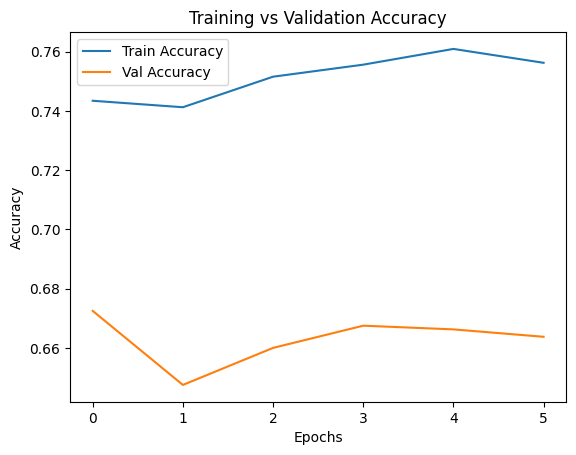

In [32]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.show()

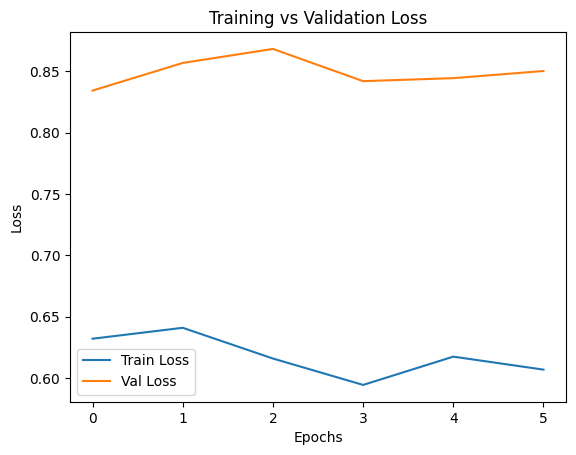

In [33]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.show()

In [34]:
model.save("dog_emotion_model.h5")

In [38]:
ld_model = load_model('dog_emotion_model.h5')
class_name = ['angry', 'happy', 'relaxed', 'sad']

def prediction_model(img_path):
    img = image.load_img(img_path,target_size = (224,224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array,axis=0)
    img_array = preprocess_input(img_array)

    prediction = ld_model.predict(img_array)
    predicted_class = class_name[np.argmax(prediction)]
    confidence = np.max(prediction)

    return predicted_class, confidence

emotion, confidence = prediction_model(r"D:\Visual Studio Code\ML\Code_Work\Dog Emotion Prediction\test_cases\sad-dog.jpg")
print(f"Predicted Emotion: {emotion} (Confidence: {confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Emotion: sad (Confidence: 0.97)
